In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**1.Load the Dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**2.Check first 5 rows of dataset**

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**3.Check the missing values**

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**4.Find shape of the dataset**

In [ ]:
df.shape

(284807, 31)

In [ ]:
print("No of Rows",df.shape[0])
print("No of Columns",df.shape[1])

No of Rows 284807
No of Columns 31


**5.Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**# Drop the 'Time' column**

In [ ]:
df=df.drop(['Time'],axis=1)

In [ ]:
df.shape

(284807, 30)

**# Check for duplicates**

In [ ]:
df.duplicated().sum()

9144

**# Drop duplicates**

In [ ]:
df.drop_duplicates(inplace=True)

**# 6. Visualize class distribution (not handling imbalance)**

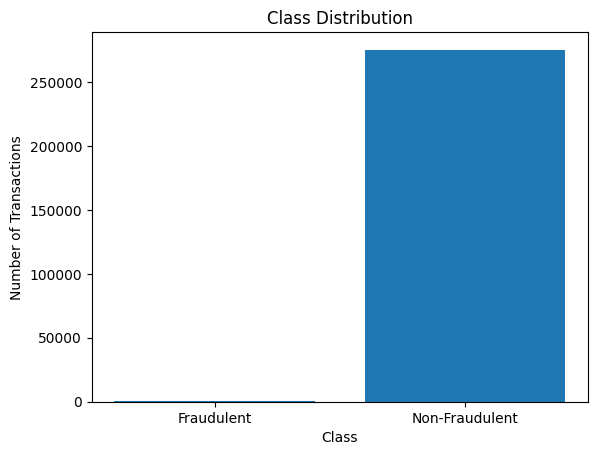

In [ ]:
# Count the number of fraudulent and non-fraudulent transactions
fraud_count = df['Class'].value_counts()[1]
non_fraud_count = df['Class'].value_counts()[0]

# Create a bar plot to visualize the class distribution
plt.bar(['Fraudulent', 'Non-Fraudulent'], [fraud_count, non_fraud_count])
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.title('Class Distribution')
plt.show()


**7.Store feature in X and Target in y**

In [ ]:
X=df.drop(['Class'],axis=1)
y=df['Class']

**8.Normalize the features**

In [ ]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

**9.Split the dataset into training and testing datasetS**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

**10.Oversample the minority class using SMOTE**

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

**# Check the class distribution after oversampling**

In [ ]:
fraud_count_resampled = y_train_resampled.value_counts()[1]
non_fraud_count_resampled = y_train_resampled.value_counts()[0]


**# Create a bar plot to visualize the class distribution after oversampling**

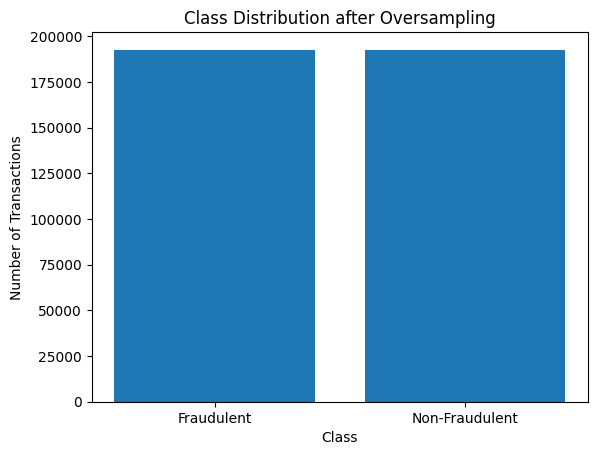

In [ ]:
plt.bar(['Fraudulent', 'Non-Fraudulent'], [fraud_count_resampled, non_fraud_count_resampled])
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.title('Class Distribution after Oversampling')
plt.show()

**11.Train a classification model (e.g., Random Forest)**

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

**12. Make predictions on the test set**

In [ ]:
y_pred = model.predict(X_test)

13. Evaluate the model

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(classification_report(y_test, y_pred))

Precision: 0.9052
Recall: 0.7721
F1-score: 0.8333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82563
           1       0.91      0.77      0.83       136

    accuracy                           1.00     82699
   macro avg       0.95      0.89      0.92     82699
weighted avg       1.00      1.00      1.00     82699



In [ ]:
# Extract all values from the dataset
all_values = df.values

# Define the data point to predict
data_point = all_values[-1]

# Separate features and target
features = data_point[:-1]
target = data_point[-1]

# Normalize the features
scaled_features = scaler.transform([features])

# Predict the class
predicted_class = model.predict(scaled_features)[0]

# Print the prediction
print(f"Predicted class for the data point: {predicted_class}")


Predicted class for the data point: 0
